# Make nice plots in GEOV325

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Definitions
res = 10 # [km]

In [12]:
# Load elevation
z = np.load('model-input/grl' + str(res) + '_surface.npy') # Elevation
z = np.flipud(z) # Flip field upside down

# Get shape of matrix
nlat = z.shape[0]
nlon = z.shape[1]

In [13]:
# Create some dummy field
dummy_field = z*0.1 -40

In [14]:
# Colors
# Info on colormaps here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 'RdBu' or 'coolwarm' are very nice for things like SMB or temperature 
# For precipitation (which is never negative) it can be nice to use a colormap that's not diverging

# Tip: reverse coloring of all colormaps by adding '_r', for example 'RdBu_r'

cmap = 'RdBu'

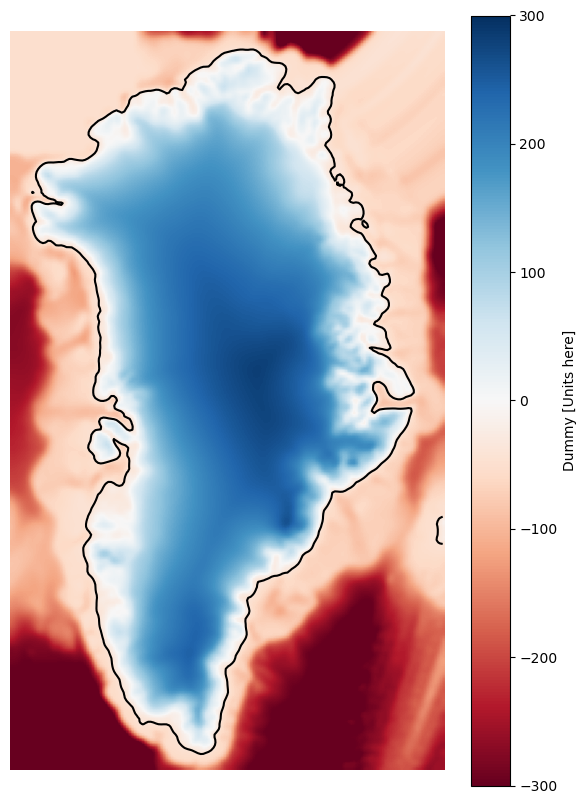

In [15]:
# Make a plot showing a colorbar and units
fig, ax = plt.subplots(1,1,figsize=(7, 10))

# vmin and vmax controls min and max of the colorbar.
cmap_dummy = plt.imshow(dummy_field, vmin = -300, vmax = 300, cmap=cmap) 
fig.colorbar(cmap_dummy, label='Dummy [Units here]') # Include colorbar and units

# Show contour of GrIS at sea level
ax.contour(z, [0], colors=['black']) 

plt.axis('off') # Remove ticks

plt.show()

In [16]:
# In this glaciology course, we're not working with the ocean, so there's really no need to plot it

dummy_noocean = dummy_field.copy() # Copy previous field
dummy_noocean[z<0] = np.nan # Set everything below sea level to a NaN (Not a Number)

# Beware! Working with fields filled with NaNs can be a pain. 
# A good rule is to only _plot_ with NaNs, but do calculations with fields that have "normal" numbers in them.

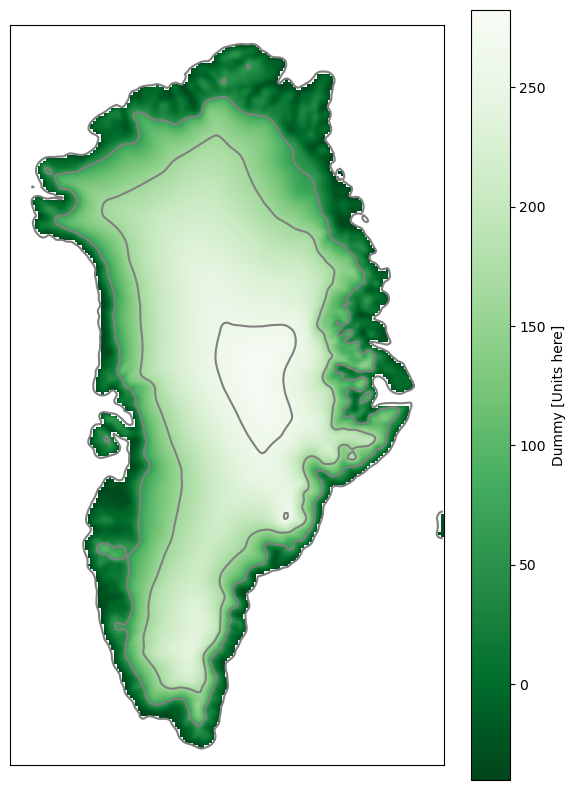

In [17]:
cmap = 'Greens_r'

fig, ax = plt.subplots(1,1,figsize=(7, 10))

cmap_dummy = plt.imshow(dummy_noocean, cmap=cmap) 
fig.colorbar(cmap_dummy, label='Dummy [Units here]') # Include colorbar and units

# Show contours at chosen elevation points, remember to write in fig text which altitudes you contour
ax.contour(z, [0, 1000, 2000, 3000], colors=['gray']) 

# Remove ticks, but keep border around plot
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()

In [18]:
# Let's add some coordinates

# Load data
lat = np.load('model-input/grl' + str(res) + '_lat.npy')
lon = np.load('model-input/grl' + str(res) + '_lon.npy')

# These are 1D arrays, reshape and flip
lat = np.flipud(np.reshape(lat, (nlat, nlon)))
lon = np.flipud(np.reshape(lon, (nlat, nlon))) - 360

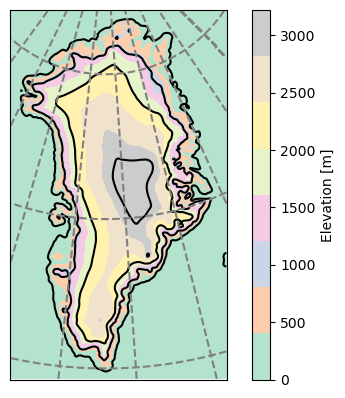

In [19]:
# Plot latitude and longitude lines

cmap = 'Pastel2'

show_lats = np.linspace(60, 80, 3, endpoint=True, dtype=int)
show_lons = np.linspace(-80, -10, 8, endpoint=True, dtype=int)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.imshow(z, cmap=cmap, vmin=0, vmax=np.amax(z))
plt.colorbar(label='Elevation [m]')
plt.contour(z, [0, 1000, 2000, 3000], colors=['black'])

plt.contour(lat, show_lats, colors='gray', linestyles='dashed')
plt.contour(lon, show_lons, colors='gray', linestyles='dashed')

# Challenge: Can you add lat and lon tick labels where the contour lines intersect with the axes?